In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from pprint import pprint

from sklearn.model_selection import GridSearchCV #for tunning the hyperparameters
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

### Exploratory data analysis

In [2]:
df_trainset= pd.read_csv('assets/data_train.csv')
df_trainset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,0,77516,0,13,0,0,0,0,0,2174,0,40,0,0
1,50,1,83311,0,13,1,1,1,0,0,0,0,13,0,0
2,38,2,215646,1,9,2,2,0,0,0,0,0,40,0,0
3,53,2,234721,2,7,1,2,1,1,0,0,0,40,0,0
4,28,2,338409,0,13,1,3,2,1,1,0,0,40,1,0


In [3]:
df_trainset.shape

(32561, 15)

In [4]:
df_trainset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             32561 non-null  int64
 1   workclass       32561 non-null  int64
 2   fnlwgt          32561 non-null  int64
 3   education       32561 non-null  int64
 4   education-num   32561 non-null  int64
 5   marital-status  32561 non-null  int64
 6   occupation      32561 non-null  int64
 7   relationship    32561 non-null  int64
 8   race            32561 non-null  int64
 9   sex             32561 non-null  int64
 10  capital-gain    32561 non-null  int64
 11  capital-loss    32561 non-null  int64
 12  hours-per-week  32561 non-null  int64
 13  native-country  32561 non-null  int64
 14  income          32561 non-null  int64
dtypes: int64(15)
memory usage: 3.7 MB


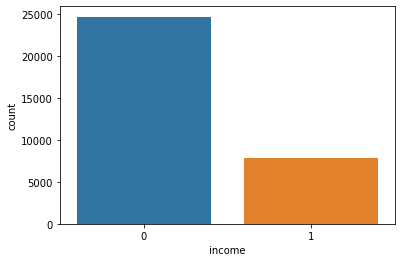

In [5]:
sns.countplot(x="income", data=df_trainset)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C8C6D5EAF0>,
      dtype=object)

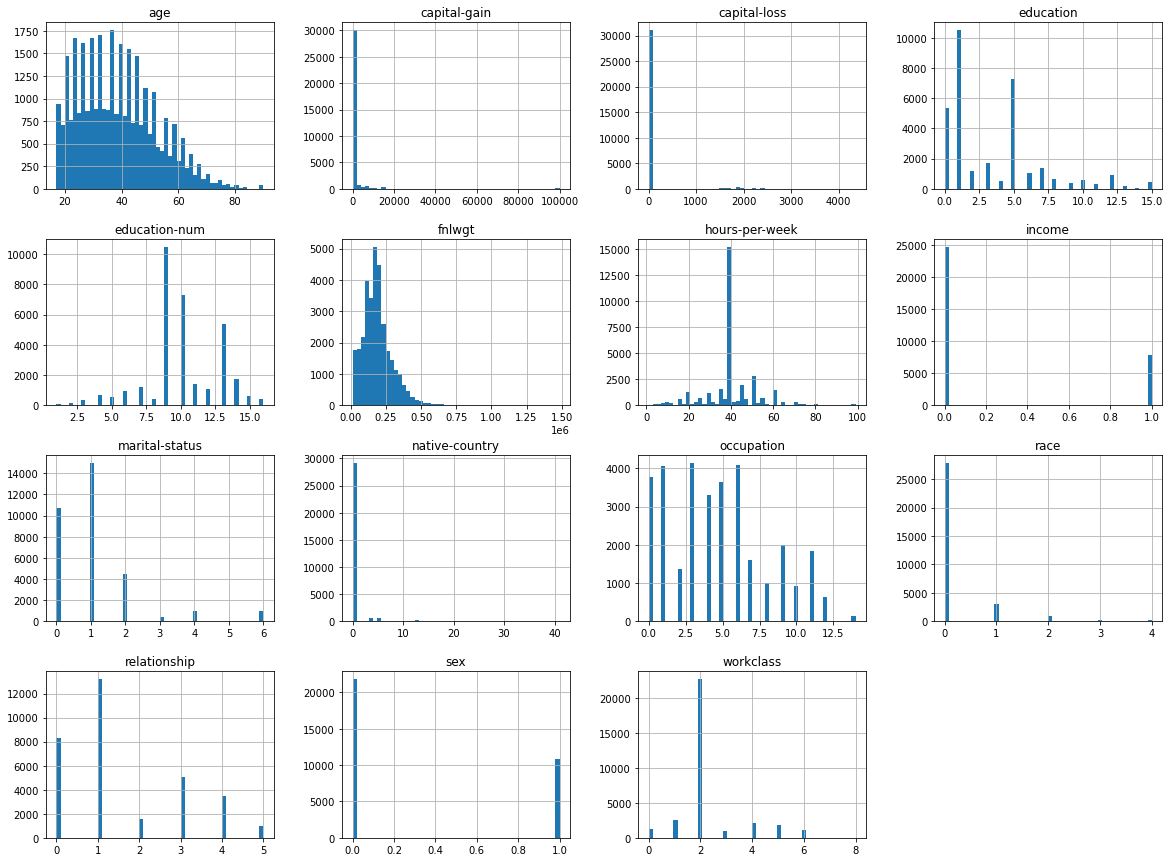

In [6]:
df_trainset.hist(bins=50, figsize=(20,15))

In [7]:
df_testset= pd.read_csv('assets/data_test.csv')
df_testset.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,2,226802,2,7,0,9,3,1,0,0,0,40,0,0
1,38,2,89814,1,9,1,8,1,0,0,0,0,50,0,0
2,28,4,336951,6,12,1,12,1,0,0,0,0,40,0,1
3,44,2,160323,5,10,1,9,1,1,0,7688,0,40,0,1
4,18,5,103497,5,10,0,11,3,0,1,0,0,30,0,0


In [20]:
df_testset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             16281 non-null  int64
 1   workclass       16281 non-null  int64
 2   fnlwgt          16281 non-null  int64
 3   education       16281 non-null  int64
 4   education-num   16281 non-null  int64
 5   marital-status  16281 non-null  int64
 6   occupation      16281 non-null  int64
 7   relationship    16281 non-null  int64
 8   race            16281 non-null  int64
 9   sex             16281 non-null  int64
 10  capital-gain    16281 non-null  int64
 11  capital-loss    16281 non-null  int64
 12  hours-per-week  16281 non-null  int64
 13  native-country  16281 non-null  int64
 14  income          16281 non-null  int64
dtypes: int64(15)
memory usage: 1.9 MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C014F19880>,
      dtype=object)

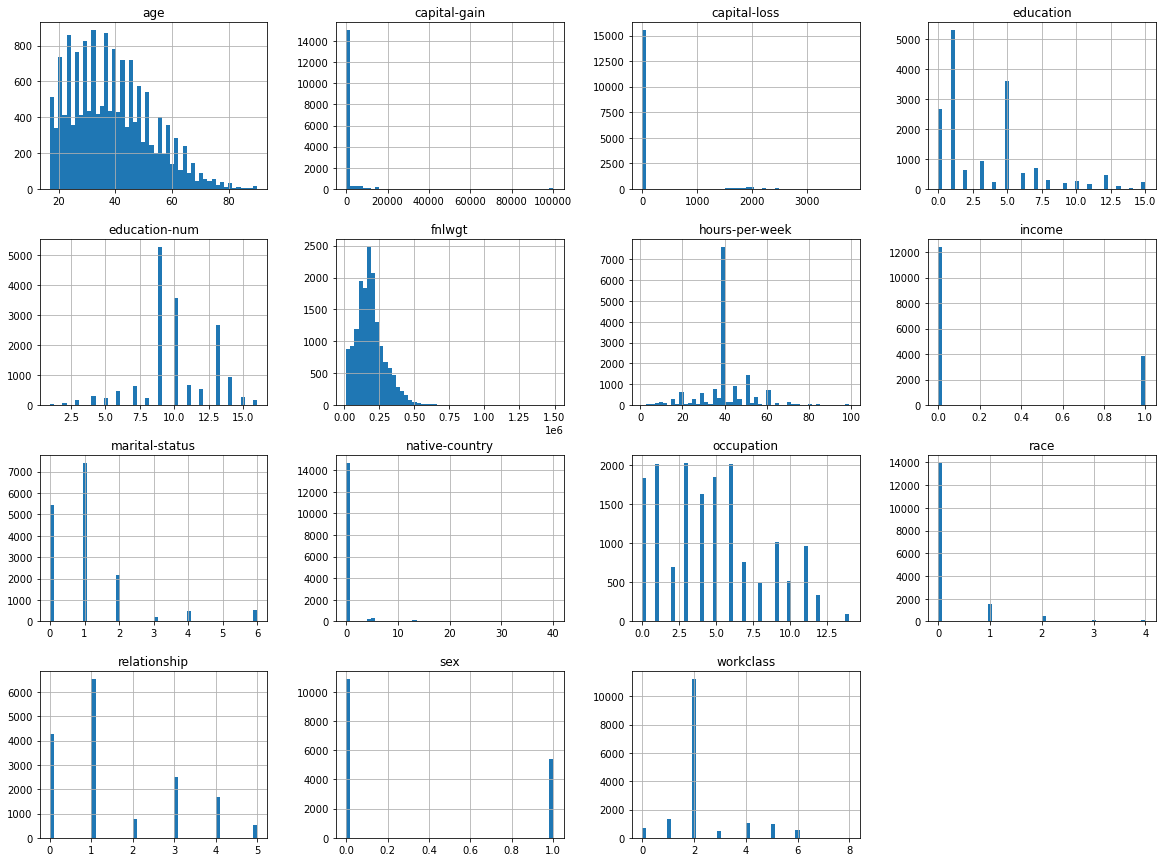

In [22]:
df_testset.hist(bins=50, figsize=(20,15))

### Fitting the model: Random Forest Classifier

In [8]:
X_train = df_trainset.drop(columns = 'income')
y_train = df_trainset['income']

X_test = df_testset.drop(columns = 'income')
y_test = df_testset['income']

In [9]:
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [10]:
y_pred = clf.predict(X_test)

In [11]:
y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int64)

### Computing Baseline accuracy

In [12]:
print('Baseline accuracy: ', metrics.accuracy_score(y_test,y_pred))

Baseline accuracy:  0.8529574350469873


Text(0.5, 1.0, 'Visualizing Important Features')

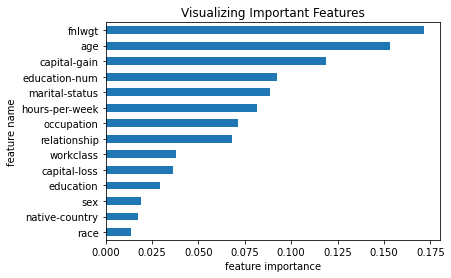

In [13]:
#Feature importance visualization
#df_trainset.columns
feature_imp = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_imp.sort_values(ascending=True).plot(kind='barh')
plt.xlabel('feature importance')
plt.ylabel('feature name')
plt.title("Visualizing Important Features")

In [17]:
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


### Running GridSearchCV using AUC and Accuracy metrics

In [23]:
# The scorers can be either be one of the predefined metric strings or a scorer
# callable, like the one returned by make_scorer
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(2, 6, num = 3)]
max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# Create the grid
hyper_param_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
               'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap
                   }

gs = GridSearchCV(RandomForestClassifier(random_state=42),
                  param_grid=hyper_param_grid,
                  scoring=scoring, refit='AUC', return_train_score=True)
gs.fit(X_train, y_train)
results = gs.cv_results_

In [30]:
results

{'mean_fit_time': array([ 0.53805776,  0.7715342 ,  0.99273429,  1.2246995 ,  1.45411415,
         1.71781187,  1.90731983,  2.14546251,  2.38584242,  2.65229139,
         0.77183924,  1.12257895,  1.45500617,  1.80417647,  2.15464845,
         2.47838964,  2.83162088,  3.15698109,  3.45027571,  3.85031137,
         1.003719  ,  1.43944736,  1.88429189,  2.343961  ,  2.7338511 ,
         3.23016496,  3.64436703,  4.16606069,  4.59679489,  4.92705359,
         2.2324717 ,  3.30385985,  4.23592906,  5.21926465,  6.2947504 ,
         7.15466366,  8.14725494,  9.20364704, 10.20479369, 11.23882275]),
 'std_fit_time': array([0.01242224, 0.01452861, 0.023041  , 0.01042316, 0.01325138,
        0.02412621, 0.02770631, 0.03288391, 0.02298507, 0.04416979,
        0.00668278, 0.03034293, 0.0200237 , 0.04973857, 0.03217234,
        0.03785586, 0.07013656, 0.03492887, 0.02688343, 0.07093674,
        0.02177952, 0.01349567, 0.02521591, 0.05291698, 0.03252798,
        0.03733548, 0.08447502, 0.1132369

In [28]:
gs.best_params_

{'max_depth': None, 'n_estimators': 500}

In [29]:
gs.best_score_

0.9077289547077843

In [24]:
def plot_grid_search_results(hyper_parameter):
    plt.figure(figsize=(13, 13))
    plt.title("GridSearchCV evaluating using AUC and accuracy",
              fontsize=16)

    plt.xlabel(hyper_parameter)
    plt.ylabel("Score")

    ax = plt.gca()
    #ax.set_xlim(0, 402)
    ax.set_ylim(0.73, 1)

    # Get the regular numpy array from the MaskedArray
    X_axis = np.array(results[f'param_{hyper_parameter}'].data, dtype=float)

    for scorer, color in zip(sorted(scoring), ['g', 'k']):
        for sample, style in (('train', '--'), ('test', '-')):
            sample_score_mean = results['mean_%s_%s' % (sample, scorer)]
            sample_score_std = results['std_%s_%s' % (sample, scorer)]
            ax.fill_between(X_axis, sample_score_mean - sample_score_std,
                            sample_score_mean + sample_score_std,
                            alpha=0.1 if sample == 'test' else 0, color=color)
            ax.plot(X_axis, sample_score_mean, style, color=color,
                    alpha=1 if sample == 'test' else 0.7,
                    label="%s (%s)" % (scorer, sample))

        best_index = np.nonzero(results['rank_test_%s' % scorer] == 1)[0][0]
        best_score = results['mean_test_%s' % scorer][best_index]

        # Plot a dotted vertical line at the best score for that scorer marked by x
        ax.plot([X_axis[best_index], ] * 2, [0, best_score],
                linestyle='-.', color=color, marker='x', markeredgewidth=3, ms=8)

        # Annotate the best score for that scorer
        ax.annotate("%0.2f" % best_score,
                    (X_axis[best_index], best_score + 0.005))

    plt.legend(loc="best")
    plt.grid(False)


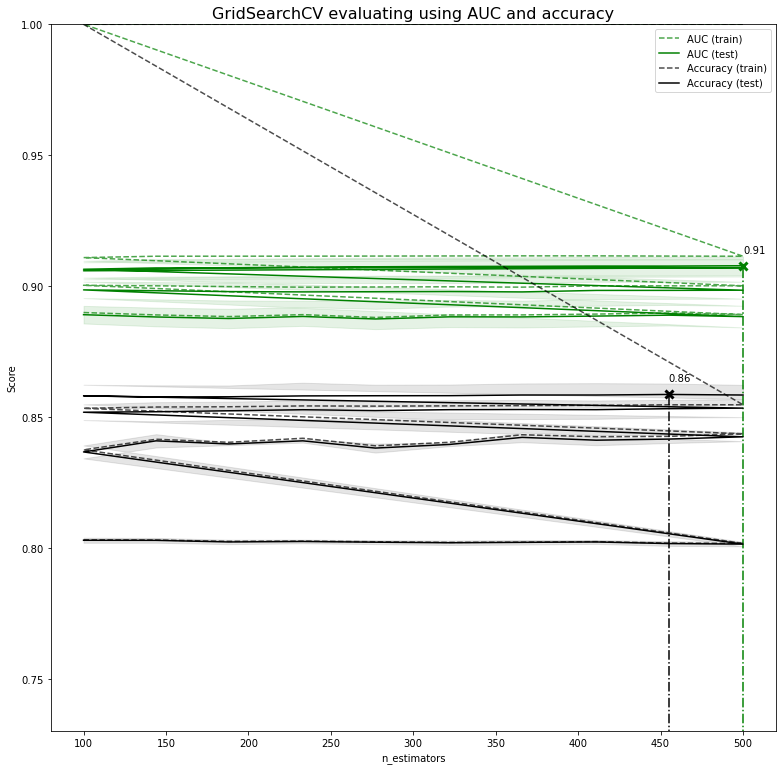

In [25]:
plot_grid_search_results('n_estimators')#'max_depth'

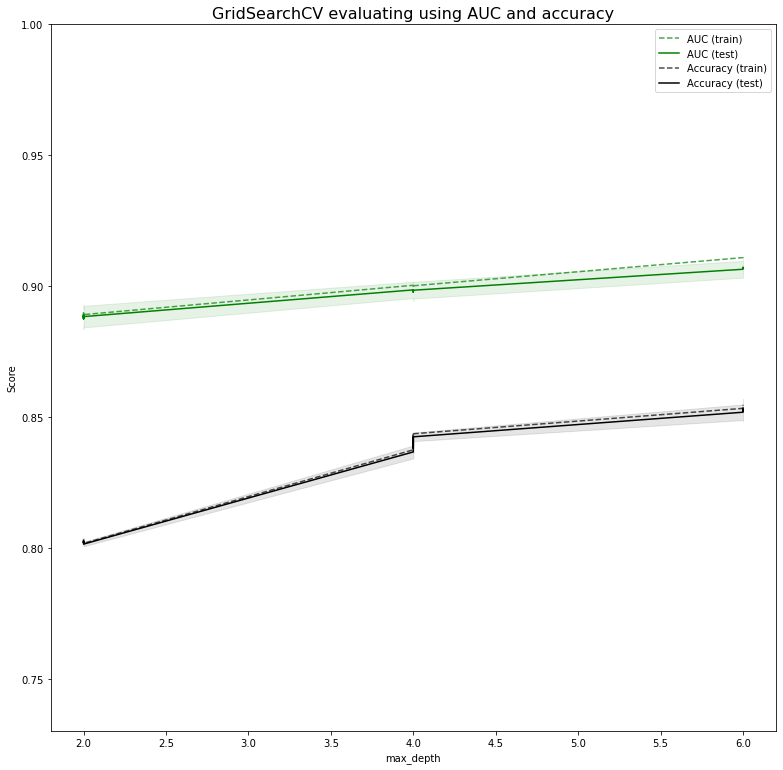

In [26]:
plot_grid_search_results('max_depth')#'max_depth'

In [32]:
y_true, y_pred = y_test, gs.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.93      0.91     12435
           1       0.73      0.61      0.67      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.77      0.79     16281
weighted avg       0.85      0.85      0.85     16281



In [33]:
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.93      0.91     12435
           1       0.73      0.61      0.66      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.77      0.78     16281
weighted avg       0.85      0.85      0.85     16281

